<a href="https://colab.research.google.com/github/Mark4815/PandasCleaning/blob/main/PandasCleaning_WinningLotteryNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Lottery_Powerball_Winning_Numbers__Beginning_2010.csv to Lottery_Powerball_Winning_Numbers__Beginning_2010.csv


In [7]:
#Initial review of the data. A sample of the first 10 rows shows 3 columns and a basic data-set.
df = pd.read_csv('Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')
df.head(10)

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
5,10/14/2020,21 37 52 53 58 05,2.0
6,10/17/2020,06 10 31 37 44 23,2.0
7,10/21/2020,01 03 13 44 56 26,3.0
8,10/24/2020,18 20 27 45 65 06,2.0
9,10/28/2020,11 28 37 40 53 13,2.0


In [9]:
#This shows that in the multiplier column, there were 210 null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1807 non-null   object 
 1   Winning Numbers  1807 non-null   object 
 2   Multiplier       1597 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.5+ KB


In [18]:
#This then looks at the NaN values within the Multiplier column to ensure there aren't obvious issues. Then replaces these with the numeric 0 which is better suited.
nan_multipliers = df[df['Multiplier'].isnull()]
print("Rows with NaN in 'Multiplier' column:")
print(nan_multipliers)

df['Multiplier'].fillna(0, inplace=True)

print("\nInfo after replacing NaN with 0:")
df.info()

Rows with NaN in 'Multiplier' column:
Empty DataFrame
Columns: [Draw Date, Winning Numbers, Multiplier]
Index: []

Info after replacing NaN with 0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1807 non-null   object 
 1   Winning Numbers  1807 non-null   object 
 2   Multiplier       1807 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.5+ KB


/tmp/ipython-input-18-1829554262.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Multiplier'].fillna(0, inplace=True)


In [19]:
#Converting the Multiplier field into an int64 type, rather than float, as all are whole numbers.
df['Multiplier'] = df['Multiplier'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Draw Date        1807 non-null   object
 1   Winning Numbers  1807 non-null   object
 2   Multiplier       1807 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 42.5+ KB


In [21]:
#Take the winning numbers column and split this into a list of numbers that we can use
df['Winning Numbers List'] = df['Winning Numbers'].str.split()
df.head()

,Draw Date,Winning Numbers,Multiplier,Winning Numbers List
0,09/26/2020,11 21 27 36 62 24,3,"[11, 21, 27, 36, 62, 24]"
1,09/30/2020,14 18 36 49 67 18,2,"[14, 18, 36, 49, 67, 18]"
2,10/03/2020,18 31 36 43 47 20,2,"[18, 31, 36, 43, 47, 20]"
3,10/07/2020,06 24 30 53 56 19,2,"[06, 24, 30, 53, 56, 19]"
4,10/10/2020,05 18 23 40 50 18,3,"[05, 18, 23, 40, 50, 18]"


In [22]:
# Listing the number of times a specific number has been drawn across the data-set.
from collections import Counter

all_winning_numbers = []
for numbers_list in df['Winning Numbers List']:
    all_winning_numbers.extend([int(num) for num in numbers_list])

number_counts = Counter(all_winning_numbers)

for number, count in number_counts.items():
    print(f"Number {number}: {count} times")

Number 11: 208 times
Number 21: 220 times
Number 27: 165 times
Number 36: 165 times
Number 62: 99 times
Number 24: 212 times
Number 14: 205 times
Number 18: 203 times
Number 49: 124 times
Number 67: 92 times
Number 31: 145 times
Number 43: 128 times
Number 47: 145 times
Number 20: 212 times
Number 6: 196 times
Number 30: 152 times
Number 53: 139 times
Number 56: 131 times
Number 19: 202 times
Number 5: 197 times
Number 23: 220 times
Number 40: 141 times
Number 50: 132 times
Number 37: 145 times
Number 52: 150 times
Number 58: 131 times
Number 10: 197 times
Number 44: 146 times
Number 1: 203 times
Number 3: 199 times
Number 13: 187 times
Number 26: 176 times
Number 45: 149 times
Number 65: 75 times
Number 28: 166 times
Number 2: 193 times
Number 42: 124 times
Number 55: 134 times
Number 32: 170 times
Number 33: 170 times
Number 16: 193 times
Number 48: 128 times
Number 15: 181 times
Number 17: 196 times
Number 63: 102 times
Number 7: 198 times
Number 4: 203 times
Number 51: 126 times
Nu

In [24]:
# Sort the number counts in descending order and get the top 10 numbers appearing across all-time. This shows us there isn't any particular number to call a favourite.
top_10_numbers = number_counts.most_common(10)

total_numbers = len(all_winning_numbers)

print("\nTop 10 Numbers and their Percentage of Appearance:")
for number, count in top_10_numbers:
    percentage = (count / total_numbers) * 100
    print(f"Number {number}: {count} times ({percentage:.2f}%)")


Top 10 Numbers and their Percentage of Appearance:
Number 21: 220 times (2.03%)
Number 23: 220 times (2.03%)
Number 24: 212 times (1.96%)
Number 20: 212 times (1.96%)
Number 12: 209 times (1.93%)
Number 11: 208 times (1.92%)
Number 14: 205 times (1.89%)
Number 18: 203 times (1.87%)
Number 1: 203 times (1.87%)
Number 4: 203 times (1.87%)


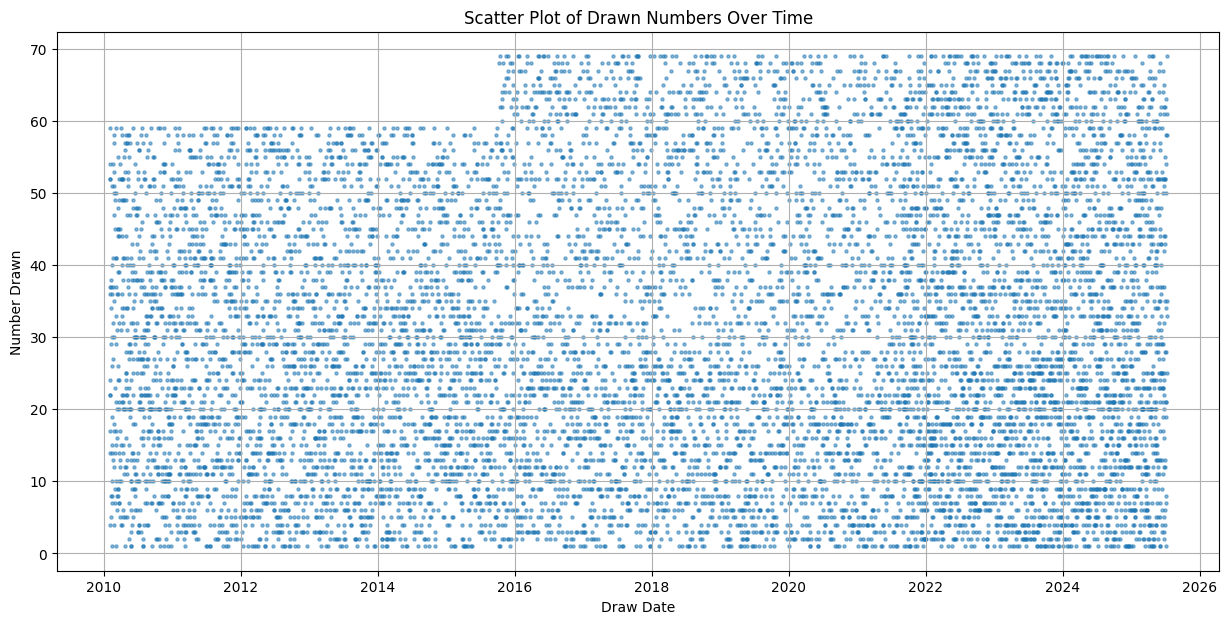

In [25]:
#trending numbers being drawn per date over time. This shows no direct trends.
import matplotlib.pyplot as plt

# Convert 'Draw Date' to datetime objects
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

# Flatten the list of winning numbers and pair each with its draw date
data = []
for index, row in df.iterrows():
    draw_date = row['Draw Date']
    winning_numbers = row['Winning Numbers List']
    for number in winning_numbers:
        data.append({'Draw Date': draw_date, 'Number': int(number)})

# Create a new DataFrame from the flattened data
df_scatter = pd.DataFrame(data)

# Plot the scatter graph
plt.figure(figsize=(15, 7))
plt.scatter(df_scatter['Draw Date'], df_scatter['Number'], alpha=0.5, s=5) # s is marker size
plt.xlabel('Draw Date')
plt.ylabel('Number Drawn')
plt.title('Scatter Plot of Drawn Numbers Over Time')
plt.grid(True)
plt.show()


In [26]:
# Expand the 'Winning Numbers List' into separate columns
df[['Winning Number 1', 'Winning Number 2', 'Winning Number 3', 'Winning Number 4', 'Winning Number 5', 'Powerball']] = pd.DataFrame(df['Winning Numbers List'].tolist(), index=df.index)

# Display the updated DataFrame with the new columns
df.head()

,Draw Date,Winning Numbers,Multiplier,Winning Numbers List,Winning Number 1,Winning Number 2,Winning Number 3,Winning Number 4,Winning Number 5,Powerball
0,2020-09-26,11 21 27 36 62 24,3,"[11, 21, 27, 36, 62, 24]",11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2,"[14, 18, 36, 49, 67, 18]",14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2,"[18, 31, 36, 43, 47, 20]",18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2,"[06, 24, 30, 53, 56, 19]",06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3,"[05, 18, 23, 40, 50, 18]",05,18,23,40,50,18


In [27]:
#Extracting the data into Postgresql to enable querying.

# Install the necessary library for PostgreSQL
!pip install psycopg2-binary

import psycopg2
from sqlalchemy import create_engine
import pandas as pd

# --- Replace with your PostgreSQL credentials and database details ---
db_user = 'your_username'
db_password = 'your_password'
db_host = 'your_host'
db_port = 'your_port' # Usually 5432
db_name = 'your_database_name'

# Create a connection string for SQLAlchemy
# Using f-string for formatting
db_connection_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create a SQLAlchemy engine
try:
    engine = create_engine(db_connection_str)
    print("Database connection engine created successfully.")
except Exception as e:
    print(f"Error creating database connection engine: {e}")
    # You might want to stop execution here if the connection fails
    # exit() # Uncomment this line if you want to stop

# --- Prepare the data for insertion ---
# Select the columns you want to insert into the database
# Ensure column names are suitable for PostgreSQL (lowercase, no spaces or special characters)
# Let's use a subset of columns for this example. Adjust as needed.
df_to_insert = df[['Draw Date', 'Winning Number 1', 'Winning Number 2', 'Winning Number 3', 'Winning Number 4', 'Winning Number 5', 'Powerball', 'Multiplier']].copy()

# Rename columns to be more PostgreSQL-friendly (lowercase and use underscores)
df_to_insert.columns = ['draw_date', 'winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'powerball', 'multiplier']

# Ensure the 'draw_date' column is in a format PostgreSQL understands
df_to_insert['draw_date'] = pd.to_datetime(df_to_insert['draw_date']).dt.date

# --- Insert the data into a PostgreSQL table ---
# Specify the table name you want to create or append to
table_name = 'lottery_draws'

try:
    # Use the to_sql method to write the DataFrame to the PostgreSQL database
    # if_exists='replace' will drop the table and recreate it
    # if_exists='append' will append data to an existing table
    # index=False means we don't write the DataFrame index as a column
    df_to_insert.to_sql(table_name, engine, if_exists='replace', index=False)

    print(f"Data successfully written to the '{table_name}' table in PostgreSQL.")

except Exception as e:
    print(f"Error writing data to PostgreSQL: {e}")

# You can optionally close the engine connection if you're done
# engine.dispose()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.8 MB/s eta 0:00:00
Error creating database connection engine: invalid literal for int() with base 10: 'your_port'
Error writing data to PostgreSQL: name 'engine' is not defined
